<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(_2_4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.4_n20.csv',
 'data_multi_delta_-2.4_n30.csv',
 'data_multi_delta_-2.4_n60.csv',
 'data_multi_delta_-2.4_n120.csv',
 'data_multi_delta_-2.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,28.642569,34.917754,-0.006815,73.553508,73.551608,0.001900
1,0.0,1.0,24.038986,62.891937,0.004609,96.935532,96.928276,0.007257
2,0.0,2.0,45.847078,58.969872,-0.013750,114.803201,114.813272,-0.010071
3,0.0,3.0,41.432044,69.568313,-0.006486,120.993871,120.999000,-0.005129
4,0.0,4.0,31.567423,62.702025,-0.003158,104.266290,104.266695,-0.000405
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,23.680688,79.692927,0.001506,113.375121,113.371211,0.003910
29996,999.0,26.0,49.693222,24.842445,-0.004053,84.531615,84.527545,0.004070
29997,999.0,27.0,57.732807,65.106617,0.000184,132.839608,132.837312,0.002296
29998,999.0,28.0,97.101075,30.771241,0.002631,137.874946,137.868165,0.006781


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,28.642569,34.917754,-0.006815,73.553508,73.551608,0.001900
1,0.0,1.0,24.038986,62.891937,0.004609,96.935532,96.928276,0.007257
2,0.0,2.0,45.847078,58.969872,-0.013750,114.803201,114.813272,-0.010071
3,0.0,3.0,41.432044,69.568313,-0.006486,120.993871,120.999000,-0.005129
4,0.0,4.0,31.567423,62.702025,-0.003158,104.266290,104.266695,-0.000405
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,23.680688,79.692927,0.001506,113.375121,113.371211,0.003910
29996,999.0,26.0,49.693222,24.842445,-0.004053,84.531615,84.527545,0.004070
29997,999.0,27.0,57.732807,65.106617,0.000184,132.839608,132.837312,0.002296
29998,999.0,28.0,97.101075,30.771241,0.002631,137.874946,137.868165,0.006781


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    28.642569  34.917754 -0.006815   73.553508   73.551608  0.001900
      1.0    24.038986  62.891937  0.004609   96.935532   96.928276  0.007257
      2.0    45.847078  58.969872 -0.013750  114.803201  114.813272 -0.010071
      3.0    41.432044  69.568313 -0.006486  120.993871  120.999000 -0.005129
      4.0    31.567423  62.702025 -0.003158  104.266290  104.266695 -0.000405
...                ...        ...       ...         ...         ...       ...
999.0 25.0   23.680688  79.692927  0.001506  113.375121  113.371211  0.003910
      26.0   49.693222  24.842445 -0.004053   84.531615   84.527545  0.004070
      27.0   57.732807  65.106617  0.000184  132.839608  132.837312  0.002296
      28.0   97.101075  30.771241  0.002631  137.874946  137.868165  0.006781
      29.0   25.542808  59.130875  0.003237   94.676921   94.668609  0.008312

[30000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    28.642569  34.917754 -0.006815   73.553508   73.551608  0.001900
      1.0    24.038986  62.891937  0.004609   96.935532   96.928276  0.007257
      2.0    45.847078  58.969872 -0.013750  114.803201  114.813272 -0.010071
      3.0    41.432044  69.568313 -0.006486  120.993871  120.999000 -0.005129
      4.0    31.567423  62.702025 -0.003158  104.266290  104.266695 -0.000405
...                ...        ...       ...         ...         ...       ...
999.0 25.0   23.680688  79.692927  0.001506  113.375121  113.371211  0.003910
      26.0   49.693222  24.842445 -0.004053   84.531615   84.527545  0.004070
      27.0   57.732807  65.106617  0.000184  132.839608  132.837312  0.002296
      28.0   97.101075  30.771241  0.002631  137.874946  137.868165  0.006781
      29.0   25.542808  59.130875  0.003237   94.676921   94.668609  0.008312

[30000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,28.642569,34.917754,-0.006815,73.553508,73.551608,0.001900
1,0.0,1.0,24.038986,62.891937,0.004609,96.935532,96.928276,0.007257
2,0.0,2.0,45.847078,58.969872,-0.013750,114.803201,114.813272,-0.010071
3,0.0,3.0,41.432044,69.568313,-0.006486,120.993871,120.999000,-0.005129
4,0.0,4.0,31.567423,62.702025,-0.003158,104.266290,104.266695,-0.000405
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,23.680688,79.692927,0.001506,113.375121,113.371211,0.003910
29996,999.0,26.0,49.693222,24.842445,-0.004053,84.531615,84.527545,0.004070
29997,999.0,27.0,57.732807,65.106617,0.000184,132.839608,132.837312,0.002296
29998,999.0,28.0,97.101075,30.771241,0.002631,137.874946,137.868165,0.006781


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    28.642569  34.917754 -0.006815   73.553508   73.551608  0.001900
      1.0    24.038986  62.891937  0.004609   96.935532   96.928276  0.007257
      2.0    45.847078  58.969872 -0.013750  114.803201  114.813272 -0.010071
      3.0    41.432044  69.568313 -0.006486  120.993871  120.999000 -0.005129
      4.0    31.567423  62.702025 -0.003158  104.266290  104.266695 -0.000405
...                ...        ...       ...         ...         ...       ...
999.0 25.0   23.680688  79.692927  0.001506  113.375121  113.371211  0.003910
      26.0   49.693222  24.842445 -0.004053   84.531615   84.527545  0.004070
      27.0   57.732807  65.106617  0.000184  132.839608  132.837312  0.002296
      28.0   97.101075  30.771241  0.002631  137.874946  137.868165  0.006781
      29.0   25.542808  59.130875  0.003237   94.676921   94.668609  0.008312

[30000 rows x 6 columns]

<AxesSubplot:xlabel='x2', ylabel='e'>

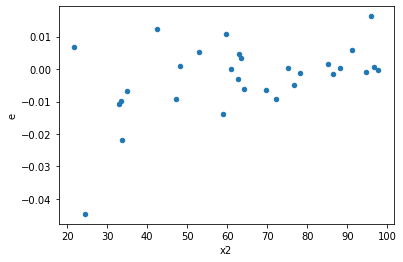

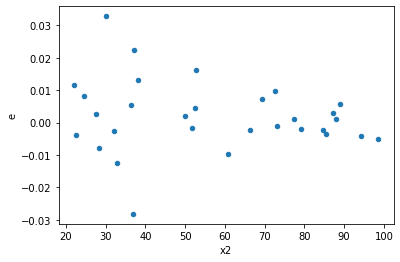

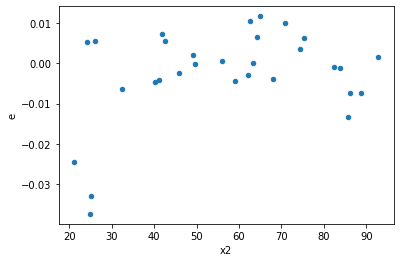

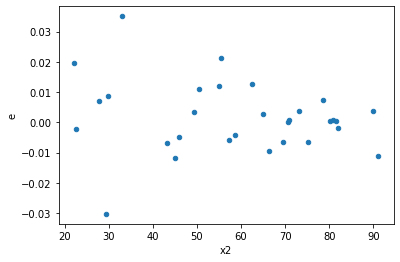

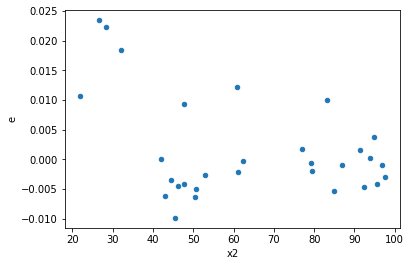

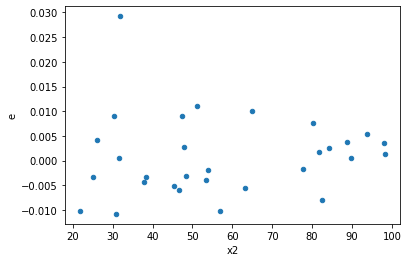

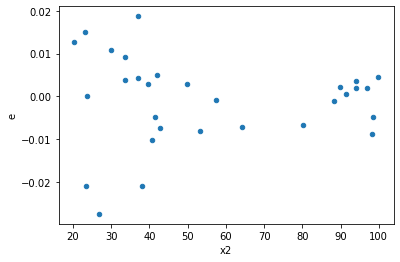

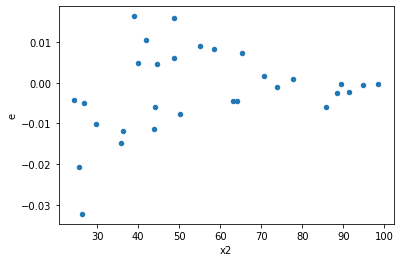

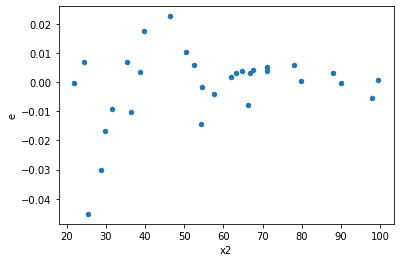

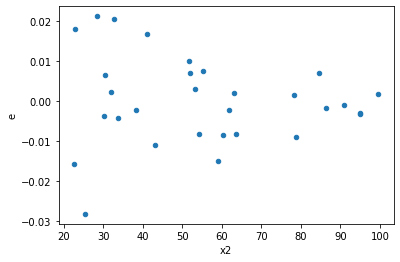

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
128.0,10.0,10.0,0.00012654556974656675,0.00022508093867610506,1.2654556974656676e-05,2.2508093867610505e-05,1.7786552237812465,0.377668391628883,0.8111658041855585,0.1888341958144415,Reject001=1 : Homoscedasticity
144.0,10.0,10.0,0.0007105441108401304,0.0009194964917290659,7.105441108401304e-05,9.194964917290659e-05,1.2940737636145843,0.6913465301661188,0.6543267349169406,0.3456732650830594,Reject001=1 : Homoscedasticity
497.0,10.0,10.0,0.0002241506034079006,0.00028839659047971017,2.241506034079006e-05,2.8839659047971015e-05,1.2866197373330162,0.6979015789480401,0.65104921052598,0.34895078947402003,Reject001=1 : Homoscedasticity
543.0,10.0,10.0,0.00017904211020033255,0.00032039754359338975,1.7904211020033255e-05,3.2039754359338975e-05,1.7895094245420409,0.3727160433168233,0.8136419783415884,0.18635802165841164,Reject001=1 : Homoscedasticity
768.0,10.0,10.0,0.00036967064914688306,0.0007068842796834373,3.69670649146883e-05,7.068842796834373e-05,1.9122001741679187,0.32149699362041906,0.8392515031897905,0.16074849681020953,Reject001=1 : Homoscedasticity
888.0,10.0,10.0,0.0004318721713996302,0.00045128738566233803,4.318721713996302e-05,4.5128738566233805e-05,1.0449559280464547,0.9459340575246649,0.5270329712376676,0.47296702876233243,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,10.0,0.0022865110556830157,0.00021194152127522746,0.00022865110556830157,2.1194152127522745e-05,0.09269210430820213,0.0008264202105462374,Reject001=0 : Heteroscedasticity
1.0,10.0,10.0,0.002537446306203873,0.00014374469697426802,0.0002537446306203873,1.4374469697426803e-05,0.05664935515002726,9.300063353030716e-05,Reject001=0 : Heteroscedasticity
2.0,10.0,10.0,0.0018002743375317143,0.0003598911756471046,0.00018002743375317143,3.598911756471046e-05,0.19990907393621868,0.017870533808676845,Reject001=1 : Homoscedasticity
3.0,10.0,10.0,0.0020440419216533664,0.00027906093007054264,0.00020440419216533664,2.7906093007054264e-05,0.13652407375520867,0.004142455887754072,Reject001=0 : Heteroscedasticity
4.0,10.0,10.0,0.00044531002844423566,0.00014844856260323765,4.453100284442357e-05,1.4844856260323766e-05,0.3333600258720139,0.09787799800583587,Reject001=1 : Homoscedasticity
5.0,10.0,10.0,0.0011506502605317893,0.0002815026418742066,0.00011506502605317893,2.815026418742066e-05,0.24464657205579235,0.03639417837546672,Reject001=1 : Homoscedasticity
6.0,10.0,10.0,0.0024299464211897446,0.00019642451811944977,0.00024299464211897446,1.9642451811944976e-05,0.08083491734903227,0.00045618480540616043,Reject001=0 : Heteroscedasticity
7.0,10.0,10.0,0.0013573501065545922,0.00011989933772265794,0.0001357350106554592,1.1989933772265795e-05,0.08833339102687553,0.000671354059533604,Reject001=0 : Heteroscedasticity
8.0,10.0,10.0,0.0026993560809185084,0.00011245270727109034,0.00026993560809185086,1.1245270727109033e-05,0.04165908605611828,2.25178813921455e-05,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    688
Reject001=1 : Homoscedasticity      312
Name: Result_test, dtype: int64